<a href="https://colab.research.google.com/github/Soniprincy/Netflix-Movie-Recommendation/blob/main/netflix_by_princy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv('combined_data_1.txt', header=None, names=['cust_id', 'rating'], usecols=[0, 1])

In [7]:
df.head()

,cust_id,rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [8]:
df.columns

Index(['cust_id', 'rating'], dtype='object')

In [9]:
df

,cust_id,rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
203812,1585028,4.0
203813,2509255,4.0
203814,1337200,4.0
203815,633090,2.0


In [10]:
df.isna().sum()

cust_id     0
rating     31
dtype: int64

In [11]:
df.dtypes

cust_id     object
rating     float64
dtype: object

In [12]:
movie_count = df['rating'].isna().sum()
movie_count

31

In [13]:
# substracting numm values of movies to find exact customer count.

cust_count = df['cust_id'].nunique()
cust_count = cust_count - movie_count
cust_count

153322

In [14]:
stars = df.groupby('rating')['rating'].agg(['count'])
stars

,count
rating,
1.0,8151
2.0,17610
3.0,56223
4.0,77339
5.0,44463


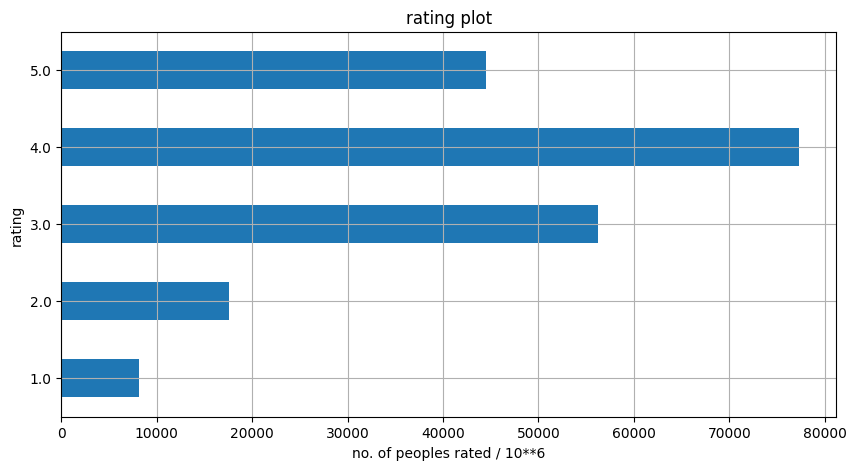

In [15]:
stars.plot(kind = 'barh', legend = False, figsize = (10,5))
plt.title('rating plot')
plt.xlabel('no. of peoples rated / 10**6')
plt.grid(True)

In [16]:
movie = None
movie_id = []
for id in df['cust_id']:
    if ':' in id:
        movie = int(id.replace(':',' '))
        movie_id.append(np.nan)
    else:
        movie_id.append(movie)


In [17]:
df['movie_id'] = movie_id

In [18]:
df

,cust_id,rating,movie_id
0,1:,NaN,NaN
1,1488844,3.0,1.0
2,822109,5.0,1.0
3,885013,4.0,1.0
4,30878,4.0,1.0
...,...,...,...
203812,1585028,4.0,30.0
203813,2509255,4.0,30.0
203814,1337200,4.0,30.0
203815,633090,2.0,30.0


In [19]:
df.isna().sum()

cust_id      0
rating      31
movie_id    30
dtype: int64

In [20]:
df.dropna(inplace=True)

In [21]:
df.isna().sum()

cust_id     0
rating      0
movie_id    0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203786 entries, 1 to 203815
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   cust_id   203786 non-null  object 
 1   rating    203786 non-null  float64
 2   movie_id  203786 non-null  float64
dtypes: float64(2), object(1)
memory usage: 6.2+ MB


In [23]:
df['cust_id'] = df['cust_id'].astype('int')
df['rating'] = df['rating'].astype('int')
df['movie_id'] = df['movie_id'].astype('int')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203786 entries, 1 to 203815
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   cust_id   203786 non-null  int64
 1   rating    203786 non-null  int64
 2   movie_id  203786 non-null  int64
dtypes: int64(3)
memory usage: 6.2 MB


In [25]:
movie_summary = df.groupby('movie_id')['rating'].agg(['count'])

In [26]:
movie_summary

,count
movie_id,
1,547
2,145
3,2012
4,142
5,1140
6,1019
7,93
8,14910
9,95


## Bench Mark -- 60%

In [27]:
benchmark = round(movie_summary['count'].quantile(0.6),0)
benchmark

777.0

In [28]:
drop_list = movie_summary[movie_summary['count']<benchmark].index
drop_list

Index([1, 2, 4, 7, 9, 10, 11, 12, 13, 14, 15, 19, 20, 21, 22, 23, 27, 29], dtype='int64', name='movie_id')

In [29]:
len(drop_list)

18

In [30]:
user_summary = df.groupby('cust_id')['rating'].agg(['count'])

In [31]:
user_summary

,count
cust_id,
6,1
7,3
42,1
59,1
79,1
...,...
2649376,1
2649378,2
2649388,1


In [32]:
cust_benchmark = round(user_summary['count'].quantile(0.6),0)

In [33]:
drop_cust = user_summary[user_summary['count']<cust_benchmark].index
drop_cust

Index([], dtype='int64', name='cust_id')

In [34]:
len(drop_cust)

0

In [35]:
df = df[~df['movie_id'].isin(drop_list)]

In [36]:
df = df[~df['cust_id'].isin(drop_cust)]

In [37]:
df.shape

(198751, 3)

In [38]:
pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357256 sha256=d9e6fbbc550e425c563d9dabbdceb137003ba0616741a979f9c84b0b97ae6c83
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [40]:
title_data = pd.read_csv('/content/movie_titles.csv',encoding='ISO-8859-1',header = None, usecols=[0,1,2],names=['movie_id','year','name'])

In [41]:
title_data.head()

,movie_id,year,name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW


In [42]:
title_data.shape

(17770, 3)

In [43]:
import math
import seaborn as sns
import matplotlib.pyplot as plt
from surprise import Reader, Dataset, SVD, accuracy
from surprise.model_selection import cross_validate

In [44]:
reader = Reader()

In [45]:
data = Dataset.load_from_df(df[['cust_id', 'movie_id', 'rating']][:,100000], reader)

InvalidIndexError: (slice(None, None, None), 100000)